In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import math

### Task 13
Polynomial Multiplication using FFT

In [57]:
n = 100
def a(x):
    sum = 0
    for i in range(0, n + 1):
        sum += x ** i
    return sum

def b(x):
    sum = 0
    for i in range(0, n + 1):
        sum += i * (x ** i)
    return sum

evaluate polynomials at points $x_{k}$  and multiply the values of the two polynomials.
Then determine coefficients from these values. Choose $x_{k}$ on the complex unit circle.
$c_{i} = FFT^{-1}(c(x_{j}))$

[0.000e+00 1.000e+00 3.000e+00 6.000e+00 1.000e+01 1.500e+01 2.100e+01
 2.800e+01 3.600e+01 4.500e+01 5.500e+01 6.600e+01 7.800e+01 9.100e+01
 1.050e+02 1.200e+02 1.360e+02 1.530e+02 1.710e+02 1.900e+02 2.100e+02
 2.310e+02 2.530e+02 2.760e+02 3.000e+02 3.250e+02 3.510e+02 3.780e+02
 4.060e+02 4.350e+02 4.650e+02 4.960e+02 5.280e+02 5.610e+02 5.950e+02
 6.300e+02 6.660e+02 7.030e+02 7.410e+02 7.800e+02 8.200e+02 8.610e+02
 9.030e+02 9.460e+02 9.900e+02 1.035e+03 1.081e+03 1.128e+03 1.176e+03
 1.225e+03 1.275e+03 1.326e+03 1.378e+03 1.431e+03 1.485e+03 1.540e+03
 1.596e+03 1.653e+03 1.711e+03 1.770e+03 1.830e+03 1.891e+03 1.953e+03
 2.016e+03 2.080e+03 2.145e+03 2.211e+03 2.278e+03 2.346e+03 2.415e+03
 2.485e+03 2.556e+03 2.628e+03 2.701e+03 2.775e+03 2.850e+03 2.926e+03
 3.003e+03 3.081e+03 3.160e+03 3.240e+03 3.321e+03 3.403e+03 3.486e+03
 3.570e+03 3.655e+03 3.741e+03 3.828e+03 3.916e+03 4.005e+03 4.095e+03
 4.186e+03 4.278e+03 4.371e+03 4.465e+03 4.560e+03 4.656e+03 4.753e+03
 4.851

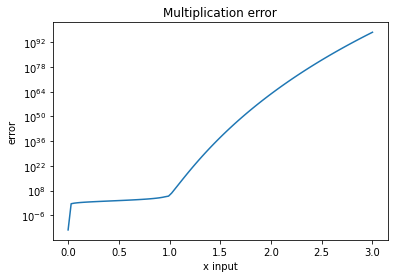

In [58]:
# pad the arrays with zeros in the end
axj = fft(np.concatenate(([1 for i in range(0, n + 1)], [0 for i in range(0, n + 1)]), axis=None))
bxj = fft(np.concatenate(([x for x in range(0, n + 1)], [0 for i in range(0, n + 1)]), axis=None))

c = axj * bxj

ci = np.real(ifft(c))

print(np.around(ci, 2))

x = np.linspace(0, 3, n + 1)
y = np.linspace(0, 0, n + 1)
for i in range(0, len(x)):
    y1 = np.polyval(ci, x[i])
    y2 = a(x[i]) * b(x[i])
    y[i] = abs(y1 - y2)

plt.title("Multiplication error")
plt.xlabel("x input")
plt.ylabel("error")

plt.yscale('log')
plt.plot(x, y)
plt.show()

### Task 14
Solving the heat equation using FFT

In [59]:
def u0_1(x):
    return np.where((0.3 <= x) & (x <= 0.7), 1.0, 0.0)

def u0_2(x):
    res = 1 - 10 * abs(x - 0.5)
    res[res <= 0] = 0
    return res

In [60]:
def plot_heat_func(u, name):
    n = 1000
    x = np.linspace(0, 1, n)
    u0 = u(x) # start values for t=0
    plt.plot(x, u0, label="t = 0")

    u0_hat = np.fft.fft(u0)
    u0_hat = np.fft.fftshift(u0_hat)
    for t in [0.01, 0.1, 1.0]:
        ut_hat = np.zeros(n)
        for j in range(0, n):
            jt = j - n/2
            ib = (2 * np.pi * jt)
            ut_hat[j] = np.exp(- ib ** 2 * t) * u0_hat[j]
        ut = np.fft.ifftshift(ut_hat)
        ut = np.fft.ifft(ut)
        plt.plot(x, ut, label="t = " + str(t))

    plt.title("Heat equation; " + name)
    plt.xlabel("space")
    plt.ylabel("temperature")
    plt.legend()
    plt.show()

<ipython-input-60-c4dd22514b26>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  ut_hat[j] = np.exp(- ib ** 2 * t) * u0_hat[j]
/Users/jakob.troidl/Desktop/cn_exercise/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-60-c4dd22514b26>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  ut_hat[j] = np.exp(- ib ** 2 * t) * u0_hat[j]
/Users/jakob.troidl/Desktop/cn_exercise/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-60-c4dd22514b26>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  ut_hat[j] = np.exp(- ib ** 2 * t) * u0_hat[j]
/Users/jakob.troidl/Desktop/cn_exercise/venv/lib/python3.8/site-packages/

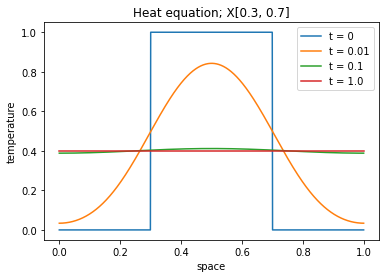

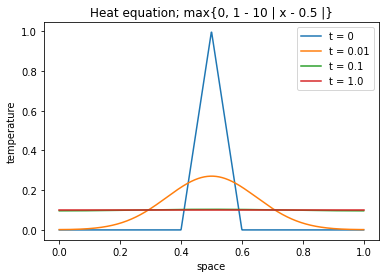

In [61]:
plot_heat_func(u0_1, "X[0.3, 0.7]")
plot_heat_func(u0_2, "max{0, 1 - 10 | x - 0.5 |}")

### Task 15
Study convergence of numerical integration

In [62]:
from scipy.integrate import quad

In [63]:
def f2(x):
    return np.sqrt(x)

def f1(x):
    return np.exp(x)

In [64]:
def ni(f, a, b, m, qr):
    # f - function to be integrated
    # a - lower integration boundary
    # b - upper integration boundary
    # m - amount of sub intervals
    # qr - quadrature rule
    h = (b - a) / m
    x = [a + i * h for i in range(0, m + 1)]

    o_sum = 0
    for j in range(0, m):
        i_sum = 0
        for cw in qr:
            ck = cw[0]
            wk = cw[1]
            i_sum += wk * f(x[j] + ck * h)
        o_sum += h * i_sum
    return o_sum


Use numerical integration

In [65]:
def plot_convergence(func, f_name):
    M = [i for i in range(1, 200)]
    a = 0
    b = 1
    gt, err = quad(func, a, b)
    

    exp_trap = [np.abs(gt - ni(func, a, b, M[i], [[0, 0.5], [1, 0.5]])) for i in range(0, len(M))]
    exp_simp = [np.abs(gt - ni(func, a, b, M[i], [[0, 1/6], [0.5, 2/3], [1, 1/6]])) for i in range(0, len(M))]
    exp_midpoint = [np.abs(gt - ni(func, a, b, M[i], [[0.5, 1]])) for i in range(0, len(M))]
    exp_gaussian_2 = [np.abs(gt - ni(func, a, b, M[i], [[0.5 - 0.5 / np.sqrt(3), 0.5], [0.5 + 0.5 / np.sqrt(3), 0.5]])) for i in range(0, len(M))]
    exp_gaussian_3 = [np.abs(gt - ni(func, a, b, M[i], [[1/2 - 1/2 * np.sqrt(3/5), 5/18], [1/2, 8/18], [1/2 + 1/2 * np.sqrt(3/5), 5/18]])) for i in range(0, len(M))]

    plt.title("NI error for " + f_name)
    plt.plot(M, exp_trap, label="trapezoidal")
    plt.plot(M, exp_simp, label="simpson")
    plt.plot(M, exp_midpoint, label="mid-point")
    plt.plot(M, exp_gaussian_2, label="2-d gaussian")
    plt.plot(M, exp_gaussian_3, label="3-d gaussian")

    plt.legend()
    plt.xlabel("# of sub intervals")
    plt.ylabel("integration error")
    plt.yscale('log')
    plt.show()

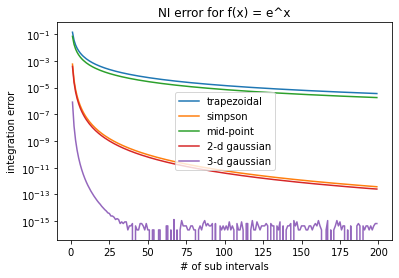

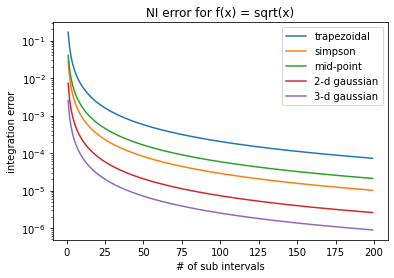

In [66]:
plot_convergence(f1, "f(x) = e^x")
plot_convergence(f2, "f(x) = sqrt(x)")

### Task 16
see plot task 15 and paper